***Part 2:Feature Selection***

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.feature_selection import SelectPercentile

In [2]:
# Load data into dataframe and check out the dimension of the data
df = pd.read_csv('divorce.csv', sep=';')
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (170, 55)


In [3]:
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
# I have categorical features and a binary target, I choose to evaluate the chi-square statistic to identify 
# independent variables for removal during feature selection

# retrieve numpy array
csDat = df.values

# Identify data and target features
features = csDat[:, :-1]
target = csDat[:,-1]

In [5]:
# Since I don't really know how many KBest to designate and my features are quantitative, I decided to use f_classif to 
# calculate ANOVA F-value statistic for each feature and the target and identify a percentile of best features.

# Select top 75% of features with highest F-values
fvalue_selector = SelectPercentile(f_classif, percentile=75)
features_kbest = fvalue_selector.fit_transform(features, target)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_kbest.shape[1])

Original number of features: 54
Reduced number of features: 40


In [ ]:
# Not sure where to go from here...how to figure out which features were the top 40, but features_kbest is an array 
# That contains the 75% best performing features.

In [6]:
# Take a different approach to identify the KBest
fs = SelectKBest(score_func=chi2, k='all')
fs.fit(features, target)

SelectKBest(k='all', score_func=<function chi2 at 0x0000016857DBE3A0>)

In [7]:
# Print the scores of each feature. The higher the better.
for i in range(len(fs.scores_)):
    print('Feature {}: {}'.format (i+1, fs.scores_[i]))

Feature 1: 186.8848063482285
Feature 2: 148.5646677937914
Feature 3: 124.86272609819119
Feature 4: 173.30274965283266
Feature 5: 233.04633621600595
Feature 6: 32.7564330621463
Feature 7: 82.000006591784
Feature 8: 210.3169282777606
Feature 9: 234.06994829064408
Feature 10: 151.00039875373955
Feature 11: 229.05224165673073
Feature 12: 166.52922248101427
Feature 13: 143.62384643779984
Feature 14: 181.5312586841199
Feature 15: 198.39810079593195
Feature 16: 203.4334621646305
Feature 17: 230.17948081326384
Feature 18: 232.75429017830314
Feature 19: 239.13623048619291
Feature 20: 230.19977315757507
Feature 21: 191.86480329222738
Feature 22: 193.4412440711256
Feature 23: 218.19773209671462
Feature 24: 178.25841229623688
Feature 25: 178.36037116550926
Feature 26: 194.78408817337026
Feature 27: 193.88834836260082
Feature 28: 199.8353860505023
Feature 29: 228.67468019985873
Feature 30: 195.78990634891568
Feature 31: 135.61506121484865
Feature 32: 148.6996124031008
Feature 33: 221.26349735409656

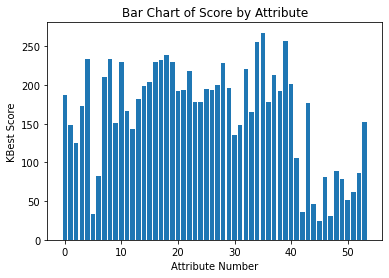

In [8]:
# Plot feature scores as a bar graph
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.title("Bar Chart of Score by Attribute")
plt.xlabel("Attribute Number")
plt.ylabel("KBest Score")
plt.show()

In [9]:
# Looking at the bar graph, I would choose a score of >100 as a point to separate valuable/less valuable features. 
# Now I just want to look at the array of scores in descending order.
fsScore_desc = np.sort(fs.scores_)[::-1]
fsScore_desc

array([267.48902924, 256.79032157, 255.47433633, 239.13623049,
       234.06994829, 233.04633622, 232.75429018, 230.19977316,
       230.17948081, 229.05224166, 228.6746802 , 221.26349735,
       218.1977321 , 213.48922018, 210.31692828, 203.43346216,
       200.95660156, 199.83538605, 198.3981008 , 195.78990635,
       194.78408817, 193.88834836, 193.44124407, 192.1763137 ,
       191.86480329, 186.88480635, 181.53125868, 178.36037117,
       178.2584123 , 177.74183863, 177.31870197, 173.30274965,
       166.52922248, 164.94121933, 152.05241949, 151.00039875,
       148.6996124 , 148.56466779, 143.62384644, 135.61506121,
       124.8627261 , 106.1025706 ,  88.92747768,  86.45775237,
        82.00000659,  80.75414852,  78.33819472,  62.11258551,
        52.00261993,  46.17412453,  36.41244162,  32.75643306,
        30.63950399,  24.49837459])

In [10]:
# Total number of scores <100 is 12. With 54 total features, that leaves 42 features that scored above 100, which is very
# close to the top 75% number of 40 features. 

***Part 3:Model Selection***

In [11]:
# Create a whole features dataset that can be used for train and validation data splitting

# Remove 12 features that scored <100
data_model_X = df.drop(['Atr6', 'Atr7', 'Atr43', 'Atr45', 'Atr46', 'Atr47', 'Atr48', 'Atr49', 'Atr50',
                    'Atr51', 'Atr52', 'Atr53'], axis=1)

In [12]:
# Label values for the target class
data_model_y = df['Class'].replace({'Married': {1: 'Married', 0: 'Divorced'}})

In [13]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

In [14]:
# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

In [15]:
# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set:  119
No. of samples in validation set: 51


In [16]:
# Married and Divorced
print('\n')
print('No. of married and divorced in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of married and divorced in the validation set:')
print(y_val.value_counts())



No. of married and divorced in the training set:
1    60
0    59
Name: Class, dtype: int64


No. of married and divorced in the validation set:
0    27
1    24
Name: Class, dtype: int64


In [24]:
# Okay, now I'm ready to select a model. Since I have a classification problem and not very many observations, I am 
# choosing to use the RandomForestClassifier
# Import libraries
from sklearn.ensemble import RandomForestClassifier

# Create the model
model = RandomForestClassifier(random_state=0, n_jobs=-1)

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


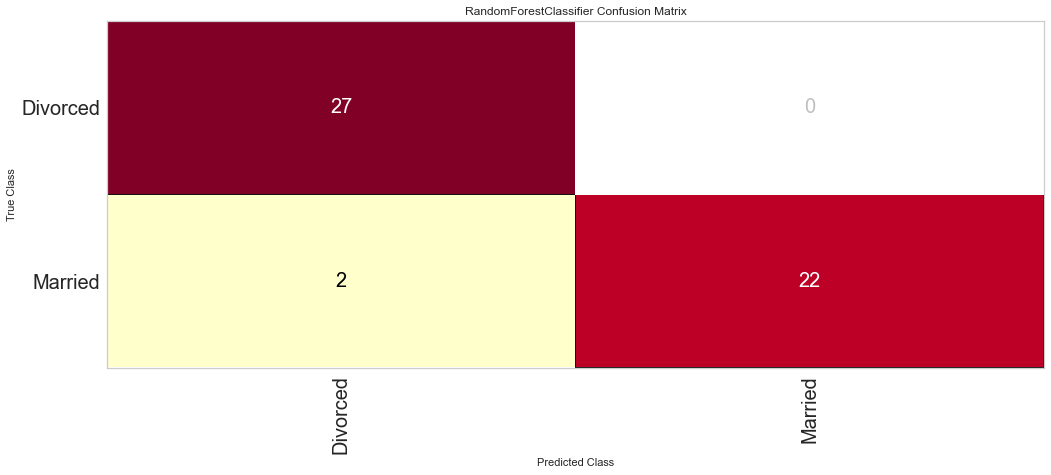

In [25]:
# fit the model and view confusion matrix results
classes = ['Divorced','Married']
cm = ConfusionMatrix(model, classes=classes, percent=False)
cm.fit(X_train, y_train)

# Use the test data to make predictions and score the results
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


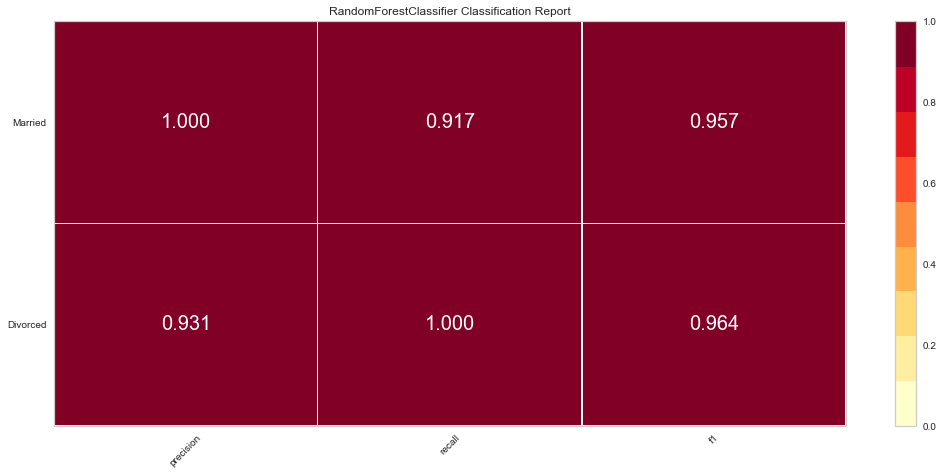

In [26]:
# Check the Precision, Recall, and F1 Score
%matplotlib inline

# import libraries
from yellowbrick.classifier import ClassificationReport

# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [27]:
# The results of the RandomForestClassifier are outstanding, but I still want to try LogisticRegression too.
# Import libraries
from sklearn.linear_model import LogisticRegression

# Create the model
logit_model = LogisticRegression(random_state=0, max_iter=1001)

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


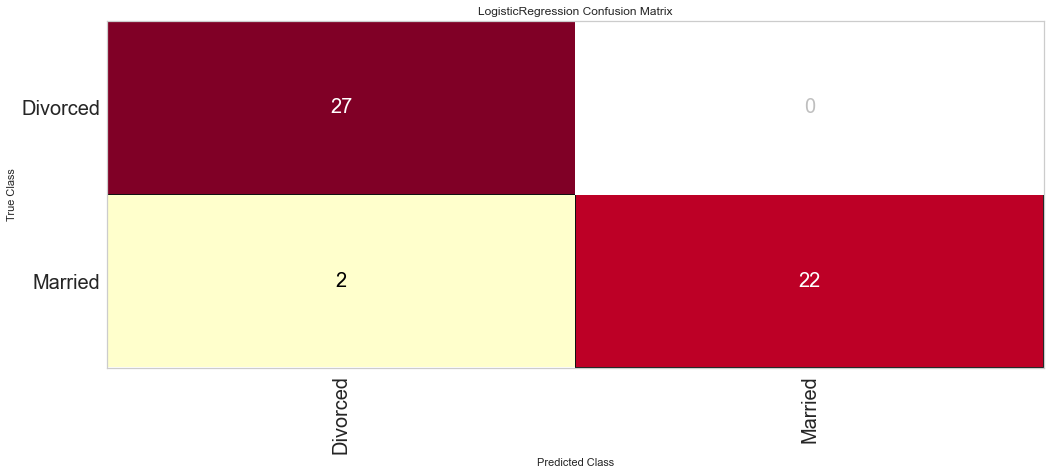

In [28]:
# fit the model and view confusion matrix results
classes = ['Divorced','Married']
cm = ConfusionMatrix(logit_model, classes=classes, percent=False)
cm.fit(X_train, y_train)

# Use the test data to make predictions and score the results
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


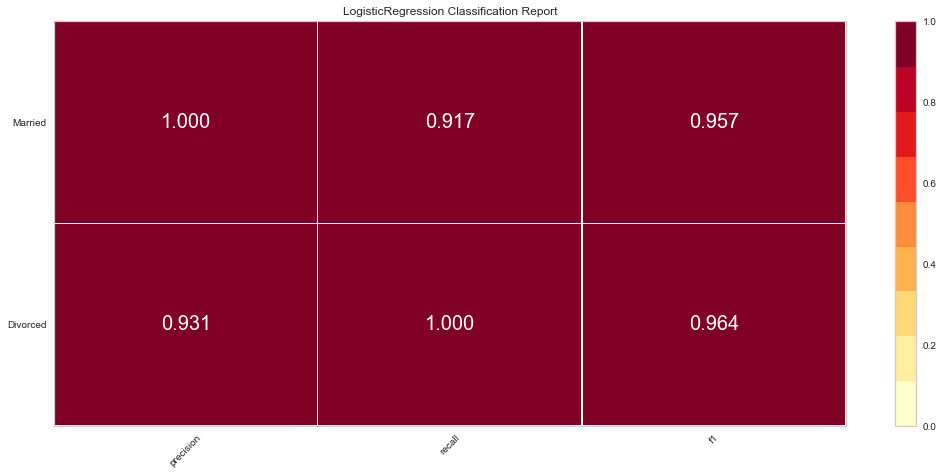

In [29]:
# Check the Precision, Recall, and F1 Score
# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(logit_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [30]:
#Hmmm...exactly the same scores. 
# I want to try using GridSearchCV to see if I can identify a better model
# import libraries
from sklearn.model_selection import GridSearchCV

# Create hyperparameter values
n_estimators = [10, 100, 1000]
max_features = [.05, .10, .15, .20, .25]

# Create dictionary of hyperparameter candidates
hyperparameters = dict(n_estimators=n_estimators, max_features=max_features)

# Create grid search
gridsearch = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

# Fit grid search
best_model = gridsearch.fit(X_train, y_train)

In [32]:
# View grid search results 
print('Best n_estimators:', best_model.best_estimator_.get_params()['n_estimators'])
print('Best max_features:', best_model.best_estimator_.get_params()['max_features'])

Best n_estimators: 10
Best max_features: 0.05


C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


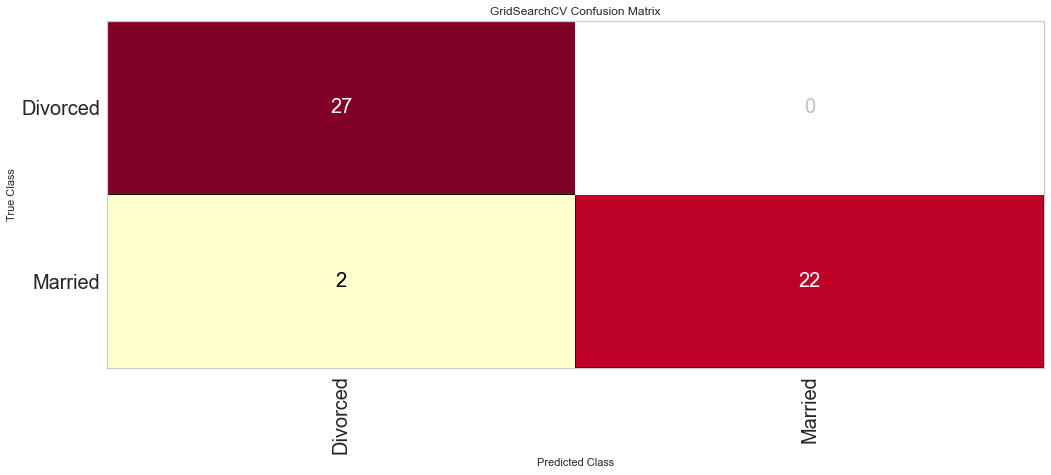

In [35]:
# Now let's view the confusion matrix for this best_model
classes = ['Divorced','Married']
cm = ConfusionMatrix(best_model, classes=classes, percent=False)

#Fit the model
cm.fit(X_train, y_train)

# Use the test data to make predictions and score the results
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


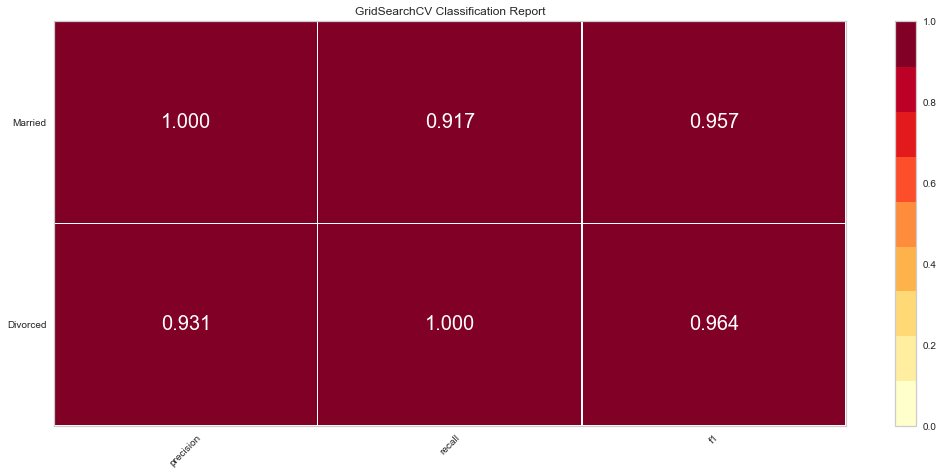

In [36]:
# Check the Precision, Recall, and F1 Score
# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(best_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [38]:
# Not sure about all the scores being exactly the same. Wish my dataset had more observations and therefore more data 
# to use for validation. I just want to try one last thing...resplitting the train-test data sets and see the results.
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=8)

In [39]:
# Married and Divorced
print('\n')
print('No. of married and divorced in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of married and divorced in the validation set:')
print(y_val.value_counts())



No. of married and divorced in the training set:
0    63
1    56
Name: Class, dtype: int64


No. of married and divorced in the validation set:
1    28
0    23
Name: Class, dtype: int64


C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


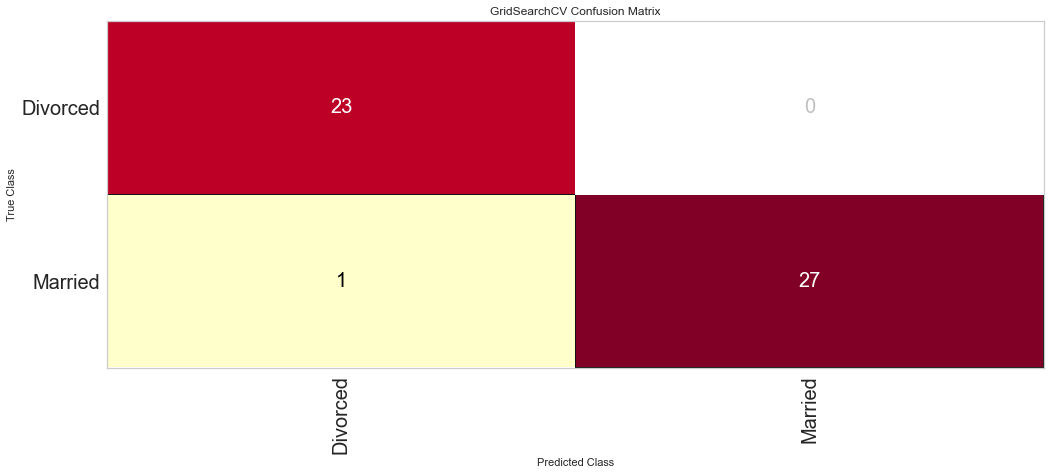

In [42]:
classes = ['Divorced','Married']
cm = ConfusionMatrix(best_model, classes=classes, percent=False)

#Fit the model
cm.fit(X_train, y_train)

# Use the test data to make predictions and score the results
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

cm.poof()

C:\Users\myraw\anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


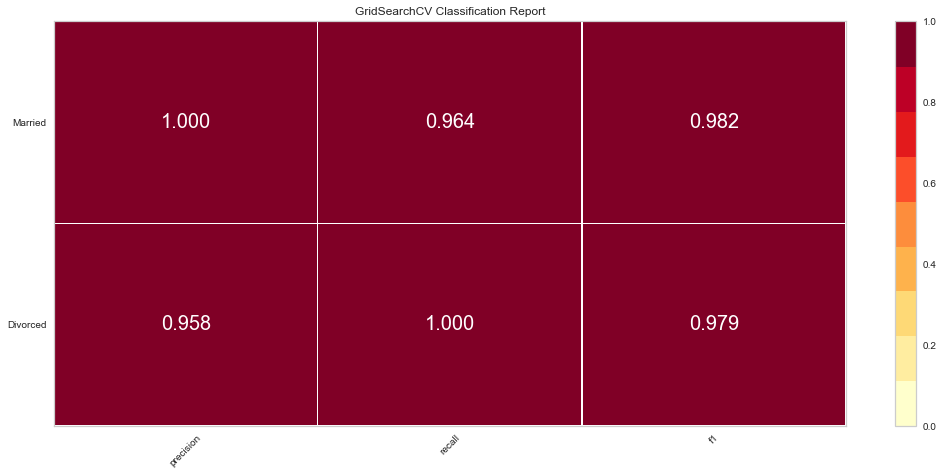

In [41]:
# Check the Precision, Recall, and F1 Score
# set the size of the figure and the font size 
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(best_model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

In [ ]:
# The predictions and scores got even better. It may be possible that this model is overfit.